In [96]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# satss models
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tools.eval_measures import rmse

#Time aeries analysis -PDMARIMA
import pmdarima
from pmdarima.arima import auto_arima

#Time series analysis -FBPROPHET
import fbprophet
from fbprophet import Prophet

Reading the cleaed data

In [97]:
paris = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\05 - Time Series\Paris_clean_for_ts.csv')

In [98]:
paris.head()

,datetime,pm25,pm10,o3,no2
0,2014-01-01,43.0,30.0,22.0,42.0
1,2014-01-02,53.0,33.0,22.0,34.0
2,2014-01-03,50.0,28.0,23.0,41.0
3,2014-01-04,52.0,23.0,19.0,34.0
4,2014-01-05,45.0,20.0,20.0,30.0


In [99]:
paris.datetime= pd.to_datetime(paris.datetime)

In [100]:
paris.dtypes

datetime    datetime64[ns]
pm25               float64
pm10               float64
o3                 float64
no2                float64
dtype: object

<AxesSubplot:xlabel='datetime', ylabel='pm25'>

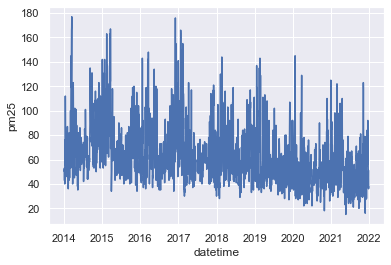

In [101]:
sns.lineplot(x='datetime', y='pm25', data=paris)

<AxesSubplot:xlabel='datetime', ylabel='pm10'>

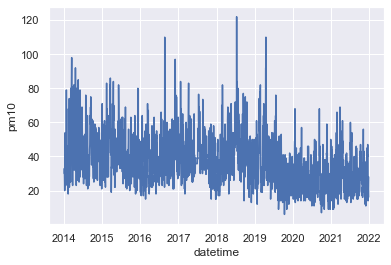

In [102]:
sns.lineplot(x='datetime', y='pm10', data=paris)

<AxesSubplot:xlabel='datetime', ylabel='o3'>

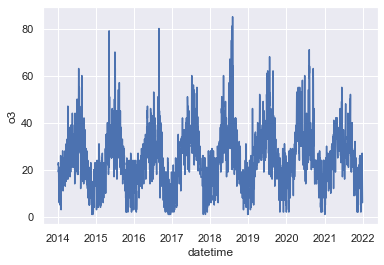

In [103]:
sns.lineplot(x='datetime', y='o3', data=paris)

<AxesSubplot:xlabel='datetime', ylabel='no2'>

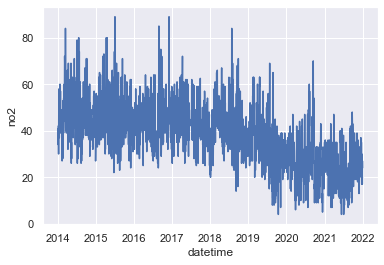

In [104]:
sns.lineplot(x='datetime', y='no2', data=paris)

## Time series analysis of PM 2.5

In [105]:
data_pm25=paris.pm25.tolist()
date_time = paris.datetime.tolist()
pm25= pd.DataFrame({'ds':date_time, 'y':data_pm25})
pm25.dtypes

ds    datetime64[ns]
y            float64
dtype: object

#### Stationarity 

In [106]:
result = adfuller(pm25.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -6.23
5% Critical Value: -2.86
p-value: 0.00


In [107]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -6.231608e+00              Test Statistics
1  4.937869e-08                      p-value
2  2.200000e+01             No. of lags used
3  2.899000e+03  Number of observations used
4 -3.432608e+00          critical value (1%)
5 -2.862538e+00          critical value (5%)
6 -2.567301e+00         critical value (10%)


Basing on the Dickey - Fuller test I can conclude that the data is stationary as the p-value is below 0.05 

#### Autocorrelation

In [108]:
autocorrelation_lag1 = paris['pm25'].autocorr(lag=1)
print("One Day Lag: ", autocorrelation_lag1)
autocorrelation_lag3 = paris['pm25'].autocorr(lag=3)
print("Three Day Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = paris['pm25'].autocorr(lag=6)
print("Six Day Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = paris['pm25'].autocorr(lag=9)
print("Nine Day Lag: ", autocorrelation_lag9)

One Day Lag:  0.7494992027538105
Three Day Lag:  0.44102496689975346
Six Day Lag:  0.291831481482925
Nine Day Lag:  0.1966319111013463


C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


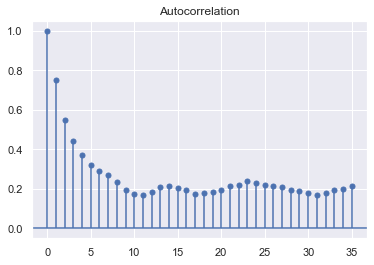

In [109]:
pmdarima.plot_acf(pm25.y)

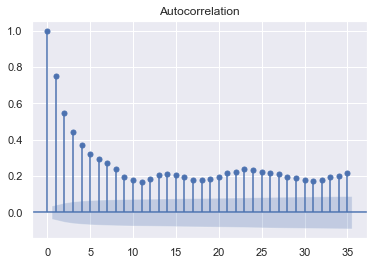

In [110]:
plot_acf(pm25.y)
plt.show()

#### Partial autocorrelation

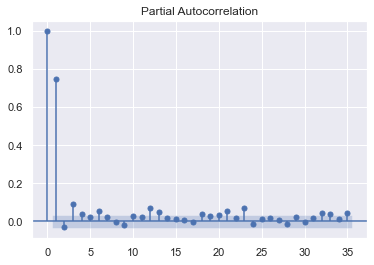

In [111]:
plot_pacf(pm25.y)
plt.show()

#### Decomposition to see the trend line

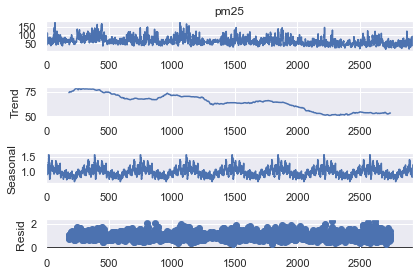

In [112]:
decompose = seasonal_decompose(paris.pm25,model='multiplicative', period=365)
decompose.plot()
plt.show()

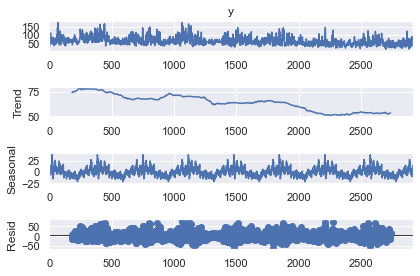

In [113]:
decompose_pm_add = seasonal_decompose(pm25.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

#### Train test split

In [114]:
(pm25.shape[0])*0.8

2337.6

In [115]:
train = pm25[:2338]
test = pm25[2338:]

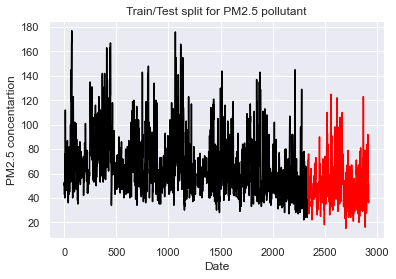

In [116]:
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for PM2.5 pollutant")
plt.ylabel("PM2.5 concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

### Prophet 

In [117]:
# define the model
model_pm25_1 = Prophet(daily_seasonality=False)
# fit the model
model_pm25_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  47.736765   21.180212   73.048580
1 2020-05-28  48.203437   22.621413   74.527746
2 2020-05-29  50.286260   23.422800   77.299897
3 2020-05-30  48.236449   21.806685   73.384447
4 2020-05-31  44.825473   18.236025   70.005085


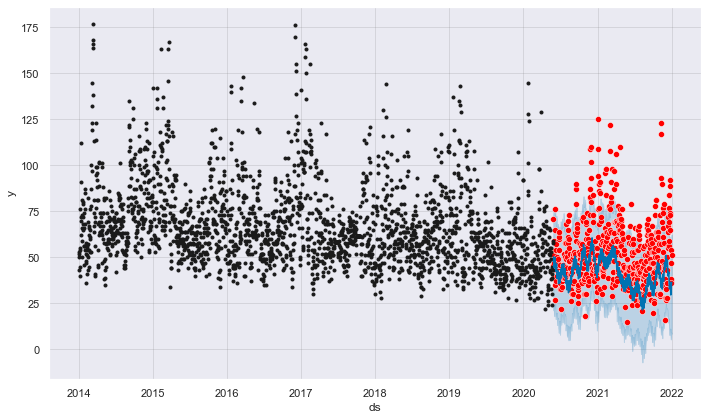

In [118]:
forecast_pm25_1 = model_pm25_1.predict(test)
# summarize the forecast
print(forecast_pm25_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_pm25_1.plot(forecast_pm25_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

In [119]:
future_1 = model_pm25_1.make_future_dataframe(periods=400, freq='D')
forecast1 = model_pm25_1.predict(future_1)
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2733,2021-06-26,39.367633,4.212183,55.484767,38.291114,40.491347,-9.283938,-9.283938,-9.283938,1.109714,1.109714,1.109714,-10.393652,-10.393652,-10.393652,0.0,0.0,0.0,30.083695
2734,2021-06-27,39.341986,1.969572,52.178814,38.260879,40.471373,-12.608432,-12.608432,-12.608432,-2.357669,-2.357669,-2.357669,-10.250763,-10.250763,-10.250763,0.0,0.0,0.0,26.733554
2735,2021-06-28,39.316339,1.022527,53.005234,38.231921,40.450912,-12.925608,-12.925608,-12.925608,-2.883416,-2.883416,-2.883416,-10.042192,-10.042192,-10.042192,0.0,0.0,0.0,26.390730
2736,2021-06-29,39.290691,1.488471,55.042797,38.202165,40.430283,-11.372339,-11.372339,-11.372339,-1.598565,-1.598565,-1.598565,-9.773774,-9.773774,-9.773774,0.0,0.0,0.0,27.918353
2737,2021-06-30,39.265044,6.617384,55.365251,38.172409,40.407013,-8.352451,-8.352451,-8.352451,1.100160,1.100160,1.100160,-9.452611,-9.452611,-9.452611,0.0,0.0,0.0,30.912593


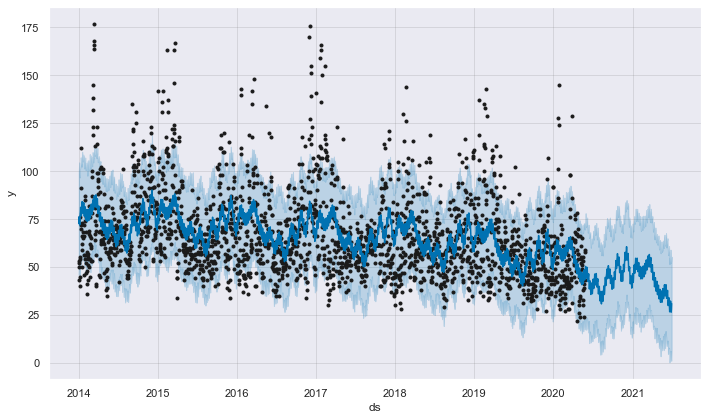

In [120]:
model_pm25_1.plot(forecast1)
plt.show()

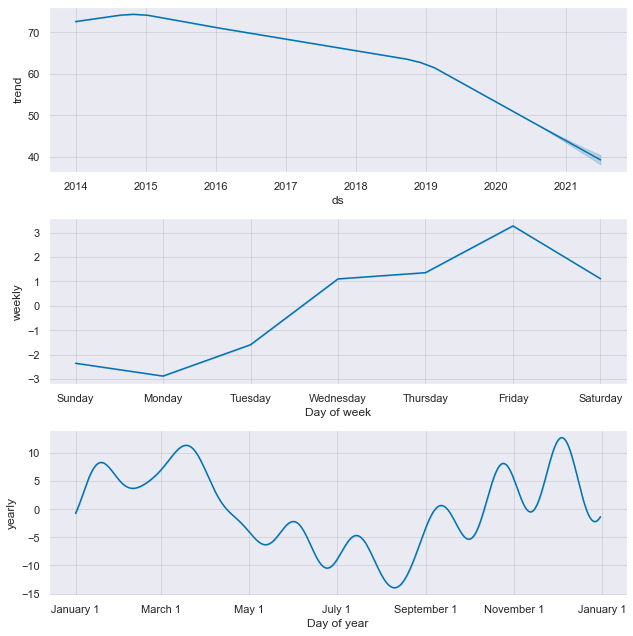

In [121]:
model_pm25_1.plot_components(forecast1)
plt.show()

Comparison of model values with real data 

In [122]:
# This test was done when dialy seasonality was not included in the model 

# rmse_pm25_prophet = rmse(test.y,forecast.yhat)
# rmse_pm25_prophet 

In [123]:
rmse_pm25_prophet_ds = rmse(test.y,forecast_pm25_1.yhat)
rmse_pm25_prophet_ds 

20.661767033407116

#### Training model on the whole historical data to make a prediction for the future

In [124]:
model_pm25_whole = Prophet(daily_seasonality=False)
# fit the model
model_pm25_whole.fit(pm25)

In [125]:
future_pm25_2022 = model_pm25_whole.make_future_dataframe(periods=365, freq='D')
forecast_pm25_2022 = model_pm25_whole.predict(future_pm25_2022)
forecast_pm25_2022.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3282,2022-12-27,48.345034,21.732272,73.154666,47.762630,49.037578,-0.626723,-0.626723,-0.626723,-1.049233,-1.049233,-1.049233,0.422510,0.422510,0.422510,0.0,0.0,0.0,47.718311
3283,2022-12-28,48.339003,24.635162,77.157031,47.753464,49.034268,2.144881,2.144881,2.144881,1.485682,1.485682,1.485682,0.659200,0.659200,0.659200,0.0,0.0,0.0,50.483884
3284,2022-12-29,48.332972,27.021744,75.834050,47.745152,49.034367,2.201875,2.201875,2.201875,1.237323,1.237323,1.237323,0.964553,0.964553,0.964553,0.0,0.0,0.0,50.534848
3285,2022-12-30,48.326942,29.240015,78.571492,47.737395,49.033721,3.978189,3.978189,3.978189,2.648342,2.648342,2.648342,1.329847,1.329847,1.329847,0.0,0.0,0.0,52.305131
3286,2022-12-31,48.320911,24.418320,75.791842,47.729637,49.031977,2.586113,2.586113,2.586113,0.840773,0.840773,0.840773,1.745340,1.745340,1.745340,0.0,0.0,0.0,50.907024


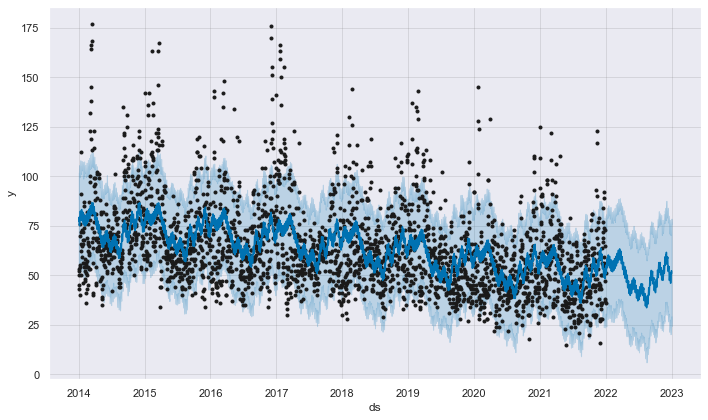

In [126]:
model_pm25_whole.plot(forecast_pm25_2022)
plt.show()

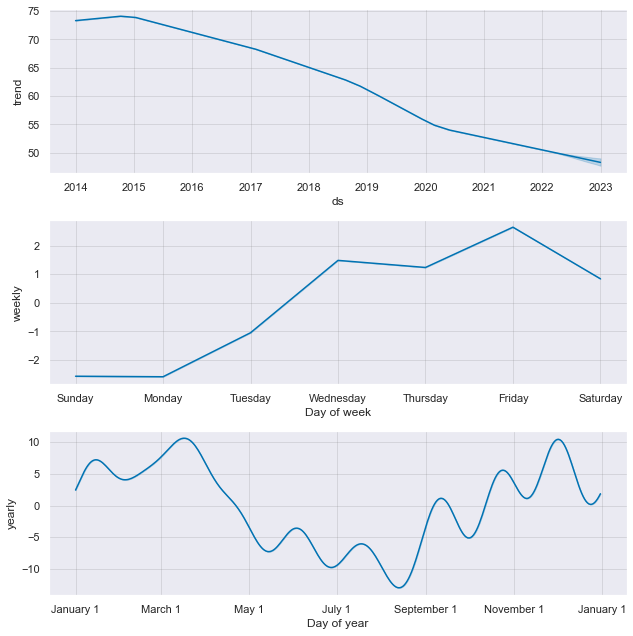

In [127]:
model_pm25_whole.plot_components(forecast_pm25_2022)
plt.show()

Adding columns tp export for later EDA analysis

In [128]:
forecast_pm25_2022.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,73.307396,52.855371,101.634306,73.307396,73.307396,3.804925,3.804925,3.804925,1.485682,1.485682,1.485682,2.319244,2.319244,2.319244,0.0,0.0,0.0,77.112322
1,2014-01-02,73.310192,51.393793,101.805344,73.310192,73.310192,4.045865,4.045865,4.045865,1.237323,1.237323,1.237323,2.808543,2.808543,2.808543,0.0,0.0,0.0,77.356057
2,2014-01-03,73.312988,53.216582,105.570522,73.312988,73.312988,5.960833,5.960833,5.960833,2.648342,2.648342,2.648342,3.312491,3.312491,3.312491,0.0,0.0,0.0,79.273821
3,2014-01-04,73.315783,52.026814,105.392015,73.315783,73.315783,4.660724,4.660724,4.660724,0.840773,0.840773,0.840773,3.819951,3.819951,3.819951,0.0,0.0,0.0,77.976507
4,2014-01-05,73.318579,49.886483,99.879012,73.318579,73.318579,1.747978,1.747978,1.747978,-2.572172,-2.572172,-2.572172,4.320150,4.320150,4.320150,0.0,0.0,0.0,75.066557


In [129]:
forecast_pm25_2022['y']=pm25['y']
forecast_pm25_2022['poll']='pm25'

In [130]:
forecast_pm25_2022.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y,poll
3282,2022-12-27,48.345034,21.732272,73.154666,47.762630,49.037578,-0.626723,-0.626723,-0.626723,-1.049233,...,-1.049233,0.422510,0.422510,0.422510,0.0,0.0,0.0,47.718311,NaN,pm25
3283,2022-12-28,48.339003,24.635162,77.157031,47.753464,49.034268,2.144881,2.144881,2.144881,1.485682,...,1.485682,0.659200,0.659200,0.659200,0.0,0.0,0.0,50.483884,NaN,pm25
3284,2022-12-29,48.332972,27.021744,75.834050,47.745152,49.034367,2.201875,2.201875,2.201875,1.237323,...,1.237323,0.964553,0.964553,0.964553,0.0,0.0,0.0,50.534848,NaN,pm25
3285,2022-12-30,48.326942,29.240015,78.571492,47.737395,49.033721,3.978189,3.978189,3.978189,2.648342,...,2.648342,1.329847,1.329847,1.329847,0.0,0.0,0.0,52.305131,NaN,pm25
3286,2022-12-31,48.320911,24.418320,75.791842,47.729637,49.031977,2.586113,2.586113,2.586113,0.840773,...,0.840773,1.745340,1.745340,1.745340,0.0,0.0,0.0,50.907024,NaN,pm25


#### Time series analysis of PM10

In [131]:
data_pm10=paris.pm10.tolist()
date_time = paris.datetime.tolist()
pm10= pd.DataFrame({'ds':date_time, 'y':data_pm10})
pm10.dtypes

ds    datetime64[ns]
y            float64
dtype: object

Stationarity

In [132]:
result = adfuller(pm10.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -5.95
5% Critical Value: -2.86
p-value: 0.00


In [133]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -5.945335e+00              Test Statistics
1  2.211109e-07                      p-value
2  2.500000e+01             No. of lags used
3  2.896000e+03  Number of observations used
4 -3.432610e+00          critical value (1%)
5 -2.862539e+00          critical value (5%)
6 -2.567302e+00         critical value (10%)


In [134]:
'''As in case of PM2.5, the PM10 data is stationary'''

'As in case of PM2.5, the PM10 data is stationary'

Auto and partial correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


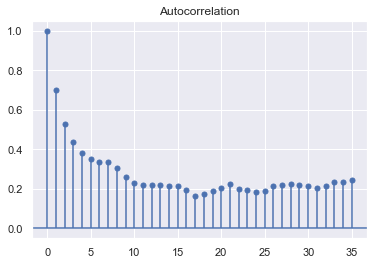

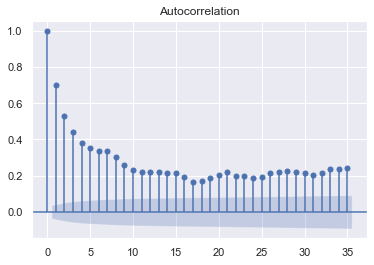

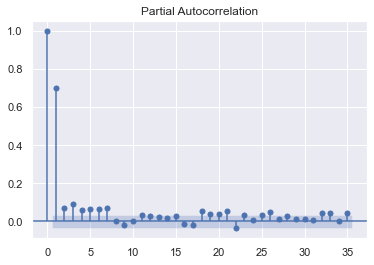

In [135]:
pmdarima.plot_acf(pm10.y)
plot_acf(pm10.y)
plt.show()
plot_pacf(pm10.y)
plt.show()

TREN LINE - Decomposition 

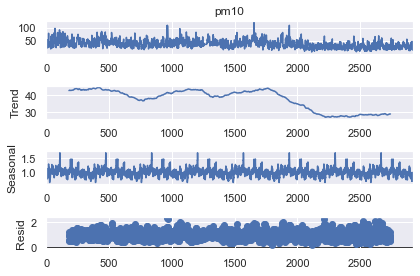

In [136]:
decompose = seasonal_decompose(paris.pm10,model='multiplicative', period=365)
decompose.plot()
plt.show()

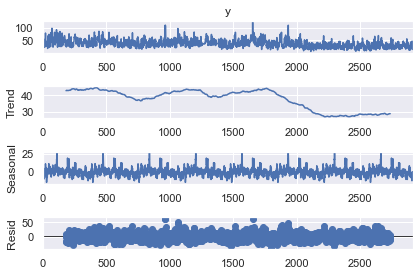

In [137]:
decompose_pm_add = seasonal_decompose(pm10.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train/test split

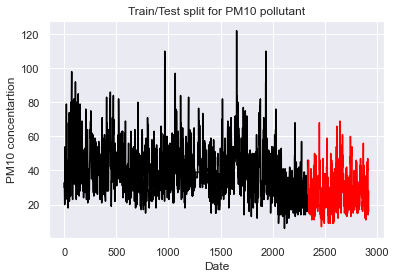

In [138]:
train = pm10[:2338]
test = pm10[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for PM10 pollutant")
plt.ylabel("PM10 concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

Prophet analysis 

In [139]:
# define the model
model_pm10_1 = Prophet(daily_seasonality=False)
# fit the model
model_pm10_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  26.821138    9.813314   42.444985
1 2020-05-28  28.047646   11.079809   44.158379
2 2020-05-29  25.034940    7.962100   41.752444
3 2020-05-30  22.257881    5.524166   39.305356
4 2020-05-31  24.422433    8.239260   41.528972


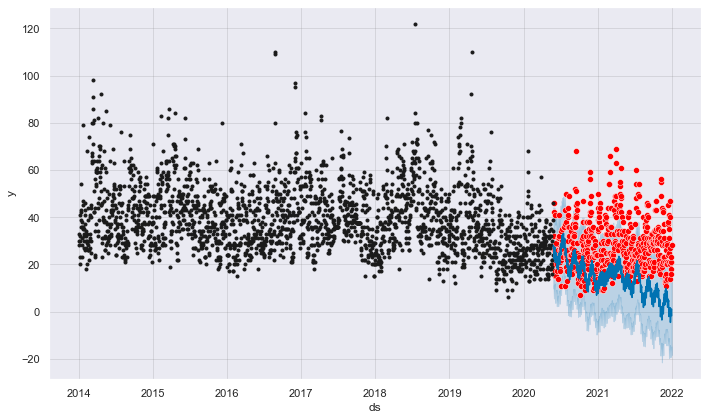

In [140]:
forecast_pm10_1 = model_pm10_1.predict(test)
# summarize the forecast
print(forecast_pm10_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_pm10_1.plot(forecast_pm10_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [141]:
rmse_pm25_prophet_ds = rmse(test.y,forecast_pm10_1.yhat)
rmse_pm25_prophet_ds 

18.221145815921858

Training model on the whole dataset

In [142]:
model_pm10_whole = Prophet(daily_seasonality=False)
# fit the model
model_pm10_whole.fit(pm10)

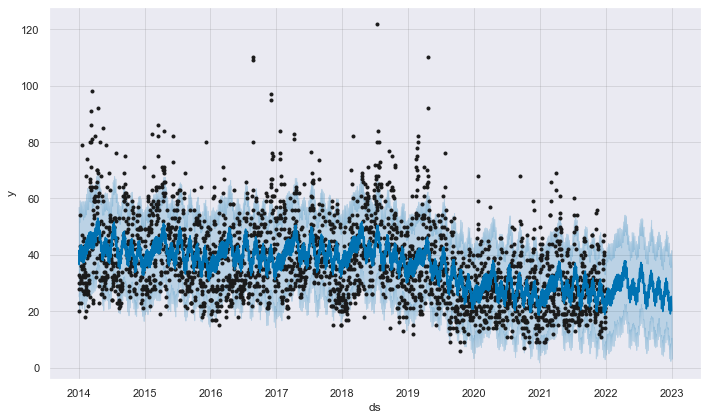

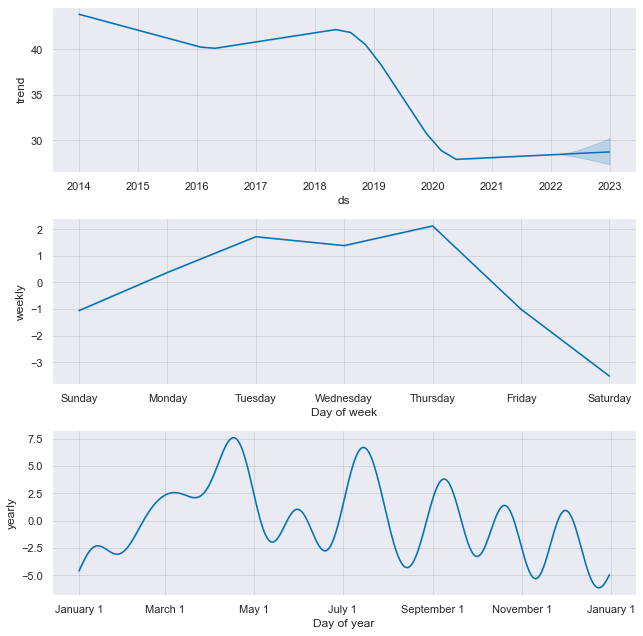

In [143]:
future_pm10_2022 = model_pm10_whole.make_future_dataframe(periods=365, freq='D')
forecast_pm10_2022 = model_pm10_whole.predict(future_pm10_2022)
forecast_pm10_2022.tail()

model_pm10_whole.plot(forecast_pm10_2022)
plt.show()

model_pm10_whole.plot_components(forecast_pm10_2022)
plt.show()

Adding columns to export later for EDA

In [144]:
forecast_pm10_2022.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,43.844285,25.282038,57.018122,43.844285,43.844285,-3.303771,-3.303771,-3.303771,1.383248,1.383248,1.383248,-4.687019,-4.687019,-4.687019,0.0,0.0,0.0,40.540514
1,2014-01-02,43.839486,26.301635,55.518822,43.839486,43.839486,-2.277539,-2.277539,-2.277539,2.122492,2.122492,2.122492,-4.400030,-4.400030,-4.400030,0.0,0.0,0.0,41.561947
2,2014-01-03,43.834687,22.460851,53.726382,43.834687,43.834687,-5.122539,-5.122539,-5.122539,-1.009571,-1.009571,-1.009571,-4.112968,-4.112968,-4.112968,0.0,0.0,0.0,38.712148
3,2014-01-04,43.829888,20.491113,51.594196,43.829888,43.829888,-7.356203,-7.356203,-7.356203,-3.523874,-3.523874,-3.523874,-3.832330,-3.832330,-3.832330,0.0,0.0,0.0,36.473684
4,2014-01-05,43.825089,24.288761,54.190896,43.825089,43.825089,-4.625824,-4.625824,-4.625824,-1.061726,-1.061726,-1.061726,-3.564098,-3.564098,-3.564098,0.0,0.0,0.0,39.199264


In [145]:
forecast_pm10_2022['y']=pm10['y']
forecast_pm10_2022['poll']='pm10'

In [146]:
forecast_pm10_2022.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y,poll
3282,2022-12-27,28.701371,8.024639,39.869100,27.345437,30.176396,-4.199506,-4.199506,-4.199506,1.717034,...,1.717034,-5.916540,-5.916540,-5.916540,0.0,0.0,0.0,24.501865,NaN,pm10
3283,2022-12-28,28.702227,8.682419,40.992257,27.343044,30.186779,-4.360719,-4.360719,-4.360719,1.383248,...,1.383248,-5.743967,-5.743967,-5.743967,0.0,0.0,0.0,24.341508,NaN,pm10
3284,2022-12-29,28.703083,10.558378,41.666294,27.341135,30.192636,-3.412660,-3.412660,-3.412660,2.122492,...,2.122492,-5.535152,-5.535152,-5.535152,0.0,0.0,0.0,25.290422,NaN,pm10
3285,2022-12-30,28.703939,7.767890,38.445722,27.337901,30.200681,-6.306164,-6.306164,-6.306164,-1.009571,...,-1.009571,-5.296593,-5.296593,-5.296593,0.0,0.0,0.0,22.397775,NaN,pm10
3286,2022-12-31,28.704795,3.154738,36.101219,27.334835,30.208596,-8.559042,-8.559042,-8.559042,-3.523874,...,-3.523874,-5.035168,-5.035168,-5.035168,0.0,0.0,0.0,20.145753,NaN,pm10


## O3

In [147]:
data_o3=paris.o3.tolist()
date_time = paris.datetime.tolist()
o3= pd.DataFrame({'ds':date_time, 'y':data_o3})
o3.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [148]:
o3.head()

,ds,y
0,2014-01-01,22.0
1,2014-01-02,22.0
2,2014-01-03,23.0
3,2014-01-04,19.0
4,2014-01-05,20.0


Stationarity

In [149]:
result = adfuller(o3.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -4.42
5% Critical Value: -2.86
p-value: 0.00


In [150]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -4.415687              Test Statistics
1     0.000278                      p-value
2    19.000000             No. of lags used
3  2902.000000  Number of observations used
4    -3.432605          critical value (1%)
5    -2.862536          critical value (5%)
6    -2.567300         critical value (10%)


In [151]:
#Data is stationary

Autocorrelation and Partial correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


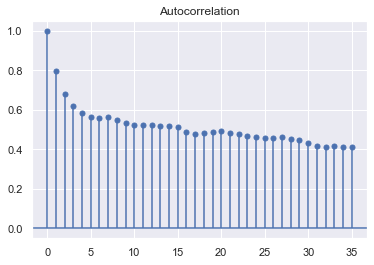

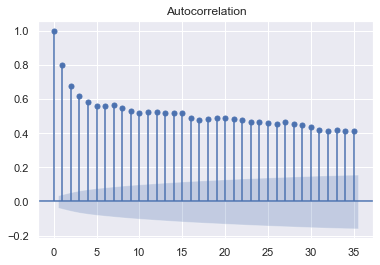

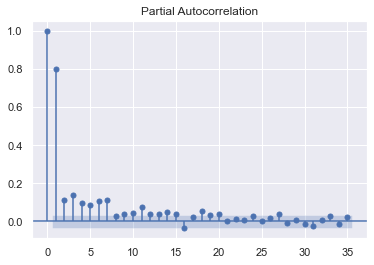

In [152]:
pmdarima.plot_acf(o3.y)
plot_acf(o3.y)
plt.show()
plot_pacf(o3.y)
plt.show()

TREND LINE

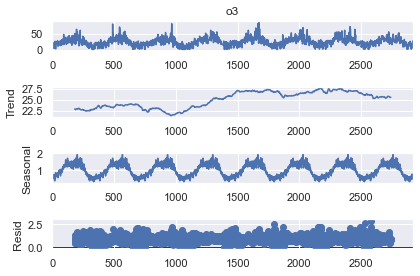

In [153]:
decompose = seasonal_decompose(paris.o3,model='multiplicative', period=365)
decompose.plot()
plt.show()

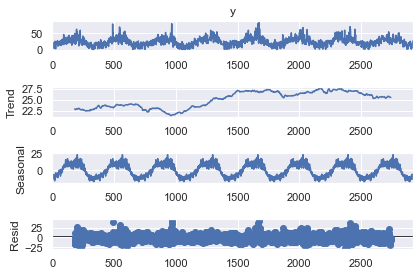

In [154]:
decompose_pm_add = seasonal_decompose(o3.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train test split

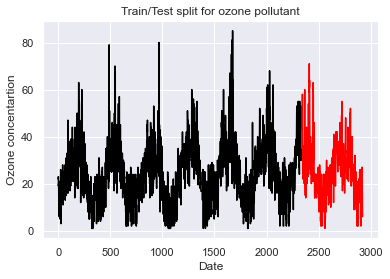

In [155]:
train = o3[:2338]
test = o3[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for ozone pollutant")
plt.ylabel("Ozone concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

Prophet analysis

In [156]:
# define the model
model_o3_1 = Prophet(daily_seasonality=True)
# fit the model
model_o3_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  35.498718   25.661805   46.160606
1 2020-05-28  35.653469   25.626202   45.513942
2 2020-05-29  36.274265   26.473463   46.687980
3 2020-05-30  36.741556   27.483436   46.772067
4 2020-05-31  34.592036   24.503052   44.427474


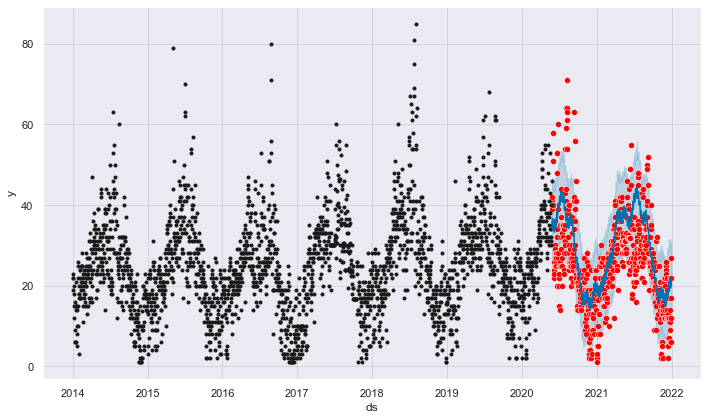

In [157]:
forecast_o3_1 = model_o3_1.predict(test)
# summarize the forecast
print(forecast_o3_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_o3_1.plot(forecast_o3_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [158]:
rmse_o3_prophet_ds = rmse(test.y,forecast_o3_1.yhat)
rmse_o3_prophet_ds 

9.177180934738384

Training on the whole dataset

In [159]:
model_o3_whole = Prophet(daily_seasonality=False)
# fit the model
model_o3_whole.fit(o3)

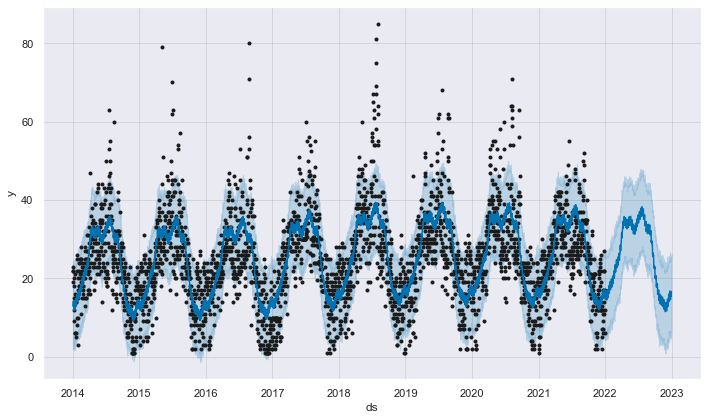

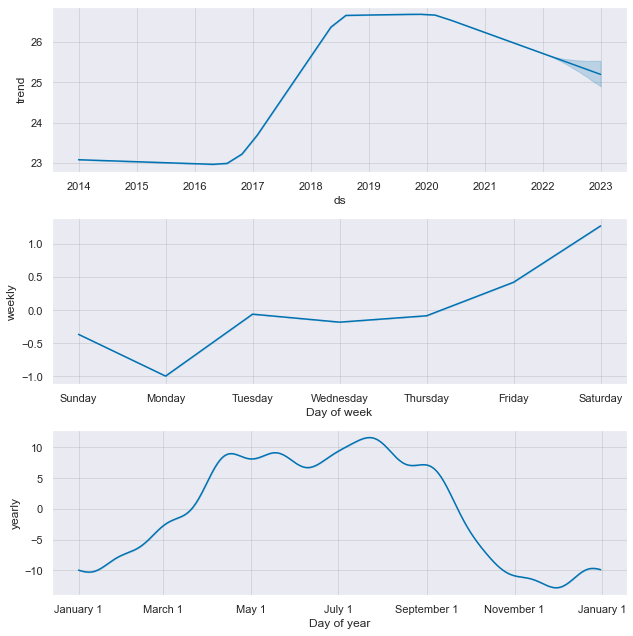

In [160]:
future_o3_2022 = model_o3_whole.make_future_dataframe(periods=365, freq='D')
forecast_o3_2022 = model_o3_whole.predict(future_o3_2022)
forecast_o3_2022.tail()

model_o3_whole.plot(forecast_o3_2022)
plt.show()

model_o3_whole.plot_components(forecast_o3_2022)
plt.show()

In [161]:
forecast_o3_2022.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,23.079504,1.988235,22.511228,23.079504,23.079504,-10.109359,-10.109359,-10.109359,-0.182019,-0.182019,-0.182019,-9.927341,-9.927341,-9.927341,0.0,0.0,0.0,12.970145
1,2014-01-02,23.079367,2.630719,23.373890,23.079367,23.079367,-10.081289,-10.081289,-10.081289,-0.085916,-0.085916,-0.085916,-9.995373,-9.995373,-9.995373,0.0,0.0,0.0,12.998077
2,2014-01-03,23.079229,2.721455,24.254283,23.079229,23.079229,-9.640887,-9.640887,-9.640887,0.420907,0.420907,0.420907,-10.061794,-10.061794,-10.061794,0.0,0.0,0.0,13.438343
3,2014-01-04,23.079092,4.726061,24.553243,23.079092,23.079092,-8.851310,-8.851310,-8.851310,1.272196,1.272196,1.272196,-10.123506,-10.123506,-10.123506,0.0,0.0,0.0,14.227782
4,2014-01-05,23.078954,2.161503,22.581824,23.078954,23.078954,-10.544225,-10.544225,-10.544225,-0.366647,-0.366647,-0.366647,-10.177578,-10.177578,-10.177578,0.0,0.0,0.0,12.534730


Adding columns to export for EDA analysis

In [162]:
forecast_o3_2022['y']=o3['y']
forecast_o3_2022['poll']='o3'

In [163]:
forecast_o3_2022.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y,poll
3282,2022-12-27,25.201922,5.705070,25.412093,24.912055,25.533692,-9.729208,-9.729208,-9.729208,-0.061365,...,-0.061365,-9.667842,-9.667842,-9.667842,0.0,0.0,0.0,15.472714,NaN,o3
3283,2022-12-28,25.200495,4.942744,25.383731,24.908499,25.533730,-9.875610,-9.875610,-9.875610,-0.182019,...,-0.182019,-9.693591,-9.693591,-9.693591,0.0,0.0,0.0,15.324885,NaN,o3
3284,2022-12-29,25.199068,4.883392,25.840566,24.904857,25.533768,-9.819392,-9.819392,-9.819392,-0.085916,...,-0.085916,-9.733476,-9.733476,-9.733476,0.0,0.0,0.0,15.379676,NaN,o3
3285,2022-12-30,25.197640,5.857359,25.316327,24.901215,25.533316,-9.363963,-9.363963,-9.363963,0.420907,...,0.420907,-9.784871,-9.784871,-9.784871,0.0,0.0,0.0,15.833677,NaN,o3
3286,2022-12-31,25.196213,7.214118,26.067961,24.897573,25.532540,-8.572691,-8.572691,-8.572691,1.272196,...,1.272196,-9.844888,-9.844888,-9.844888,0.0,0.0,0.0,16.623522,NaN,o3


## NO2

In [164]:
data_no2=paris.no2.tolist()
date_time = paris.datetime.tolist()
no2= pd.DataFrame({'ds':date_time, 'y':data_no2})
no2.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [165]:
no2.head()

,ds,y
0,2014-01-01,42.0
1,2014-01-02,34.0
2,2014-01-03,41.0
3,2014-01-04,34.0
4,2014-01-05,30.0


Stationarity

In [166]:
result = adfuller(no2.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -3.08
5% Critical Value: -2.86
p-value: 0.03


In [167]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -3.084311              Test Statistics
1     0.027736                      p-value
2    27.000000             No. of lags used
3  2894.000000  Number of observations used
4    -3.432612          critical value (1%)
5    -2.862539          critical value (5%)
6    -2.567302         critical value (10%)


In [168]:
#data is stationary 

Autocorrelation and Partial Correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


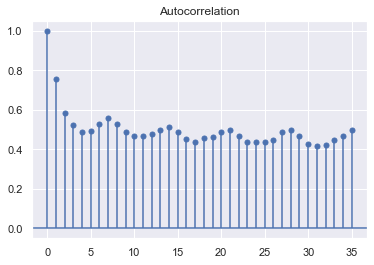

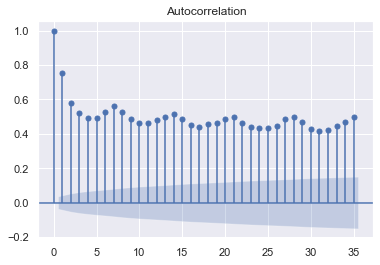

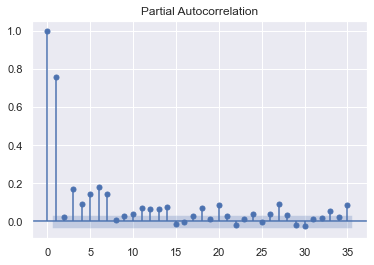

In [169]:
pmdarima.plot_acf(no2.y)
plot_acf(no2.y)
plt.show()
plot_pacf(no2.y)
plt.show()

TREND LINE

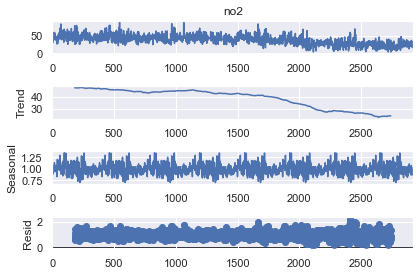

In [170]:
decompose = seasonal_decompose(paris.no2,model='multiplicative', period=365)
decompose.plot()
plt.show()

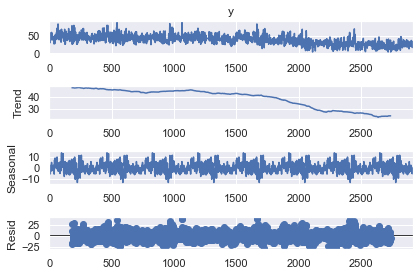

In [171]:
decompose_pm_add = seasonal_decompose(no2.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train/test split

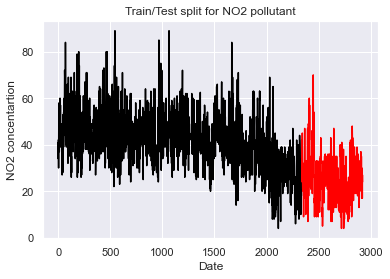

In [172]:
train = no2[:2338]
test = no2[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for NO2 pollutant")
plt.ylabel('NO2 concentartion')
plt.xlabel('Date')
sns.set()
plt.show()

Prophet Analysis

In [173]:
# define the model
model_no2_1 = Prophet(daily_seasonality=False)
# fit the model
model_no2_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  26.458398   14.780502   37.602702
1 2020-05-28  26.938040   15.119060   37.999603
2 2020-05-29  22.275516   10.333719   34.037114
3 2020-05-30  18.843662    8.550959   29.828905
4 2020-05-31  22.276150    9.865560   33.122368


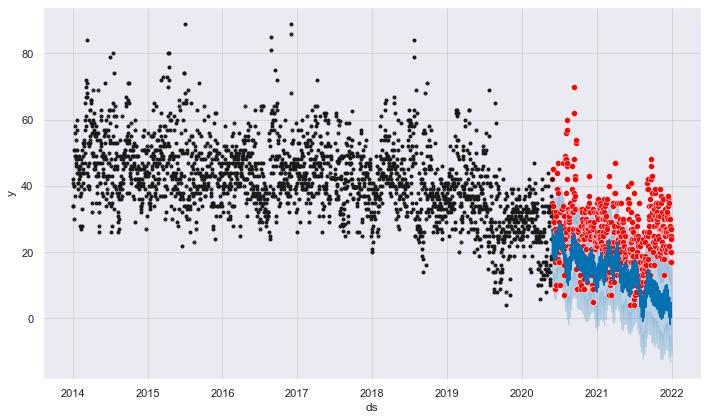

In [174]:
forecast_no2_1 = model_no2_1.predict(test)
# summarize the forecast
print(forecast_no2_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_no2_1.plot(forecast_no2_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [175]:
rmse_no2_prophet_ds = rmse(test.y,forecast_no2_1.yhat)
rmse_no2_prophet_ds 

14.764710130874546

Trainning on the whole data set

In [176]:
model_no2_whole = Prophet(daily_seasonality=False)
# fit the model
model_no2_whole.fit(no2)

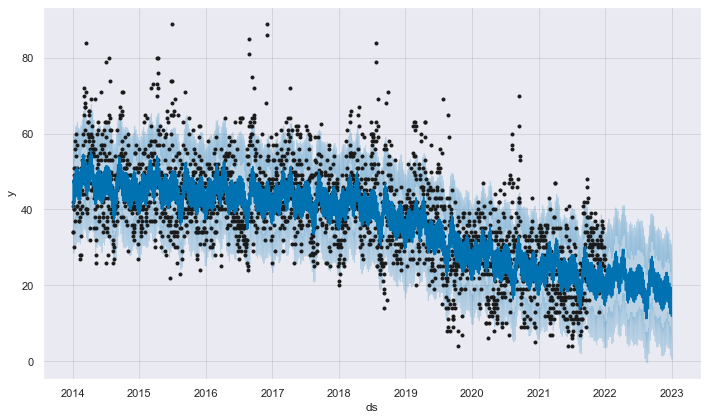

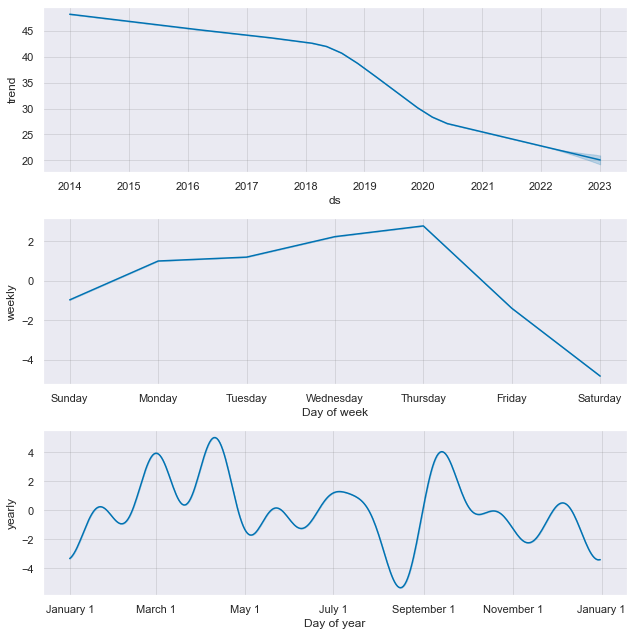

In [177]:
future_no2_2022 = model_no2_whole.make_future_dataframe(periods=365, freq='D')
forecast_no2_2022 = model_no2_whole.predict(future_no2_2022)
forecast_no2_2022.tail()

model_no2_whole.plot(forecast_no2_2022)
plt.show()

model_no2_whole.plot_components(forecast_no2_2022)
plt.show()

Adding columns to export data foe EDA

In [178]:
forecast_no2_2022.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3282,2022-12-27,20.098164,6.747823,29.717444,19.260819,20.955073,-2.060477,-2.060477,-2.060477,1.192900,1.192900,1.192900,-3.253377,-3.253377,-3.253377,0.0,0.0,0.0,18.037687
3283,2022-12-28,20.090744,8.126773,31.003643,19.247350,20.951037,-1.113269,-1.113269,-1.113269,2.230325,2.230325,2.230325,-3.343595,-3.343595,-3.343595,0.0,0.0,0.0,18.977474
3284,2022-12-29,20.083323,7.741490,31.014095,19.236091,20.946957,-0.627967,-0.627967,-0.627967,2.773422,2.773422,2.773422,-3.401389,-3.401389,-3.401389,0.0,0.0,0.0,19.455356
3285,2022-12-30,20.075903,4.373793,26.597060,19.224486,20.944569,-4.819350,-4.819350,-4.819350,-1.393759,-1.393759,-1.393759,-3.425590,-3.425590,-3.425590,0.0,0.0,0.0,15.256553
3286,2022-12-31,20.068482,0.642669,23.814875,19.212616,20.938929,-8.244310,-8.244310,-8.244310,-4.828659,-4.828659,-4.828659,-3.415650,-3.415650,-3.415650,0.0,0.0,0.0,11.824173


In [179]:
forecast_no2_2022['y']=no2['y']
forecast_no2_2022['poll']='no2'

In [180]:
forecast_no2_2022.shape

(3287, 21)

## Exporting file for EDA - Section2

In [181]:
data_sec2_paris = pd.concat([forecast_pm25_2022,forecast_pm10_2022,forecast_o3_2022,forecast_no2_2022])

In [182]:
data_sec2_paris.shape

(13148, 21)

In [188]:
data_sec2_paris['year']=data_sec2_paris['ds'].dt.year
data_sec2_paris['month']=data_sec2_paris['ds'].dt.month
data_sec2_paris['day_of_week']=data_sec2_paris['ds'].dt.day_name()

In [189]:
data_sec2_paris.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y,poll,year,month,day_of_week
0,2014-01-01,73.307396,52.855371,101.634306,73.307396,73.307396,3.804925,3.804925,3.804925,1.485682,...,2.319244,0.0,0.0,0.0,77.112322,43.0,pm25,2014,1,Wednesday
1,2014-01-02,73.310192,51.393793,101.805344,73.310192,73.310192,4.045865,4.045865,4.045865,1.237323,...,2.808543,0.0,0.0,0.0,77.356057,53.0,pm25,2014,1,Thursday
2,2014-01-03,73.312988,53.216582,105.570522,73.312988,73.312988,5.960833,5.960833,5.960833,2.648342,...,3.312491,0.0,0.0,0.0,79.273821,50.0,pm25,2014,1,Friday
3,2014-01-04,73.315783,52.026814,105.392015,73.315783,73.315783,4.660724,4.660724,4.660724,0.840773,...,3.819951,0.0,0.0,0.0,77.976507,52.0,pm25,2014,1,Saturday
4,2014-01-05,73.318579,49.886483,99.879012,73.318579,73.318579,1.747978,1.747978,1.747978,-2.572172,...,4.320150,0.0,0.0,0.0,75.066557,45.0,pm25,2014,1,Sunday


In [187]:
data_sec2_paris.to_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\07 - EDA\sec2_Paris.csv', index_label=False)